In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('../../data/PEMS04/PEMS04.csv')

In [2]:
svm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.04)

svm.fit(df[['cost']])

df['Anomaly'] = svm.predict(df[['cost']])
df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1})  

print(df)

     from   to   cost  Anomaly
0      73    5  352.6        0
1       5  154  347.2        0
2     154  263  392.9        0
3     263   56  440.8        0
4      56   96  374.6        0
..    ...  ...    ...      ...
335    46  216  353.6        0
336   217   98  411.7        0
337    98   31    3.2        1
338   217   46  354.0        0
339    46   31  163.6        0

[340 rows x 4 columns]


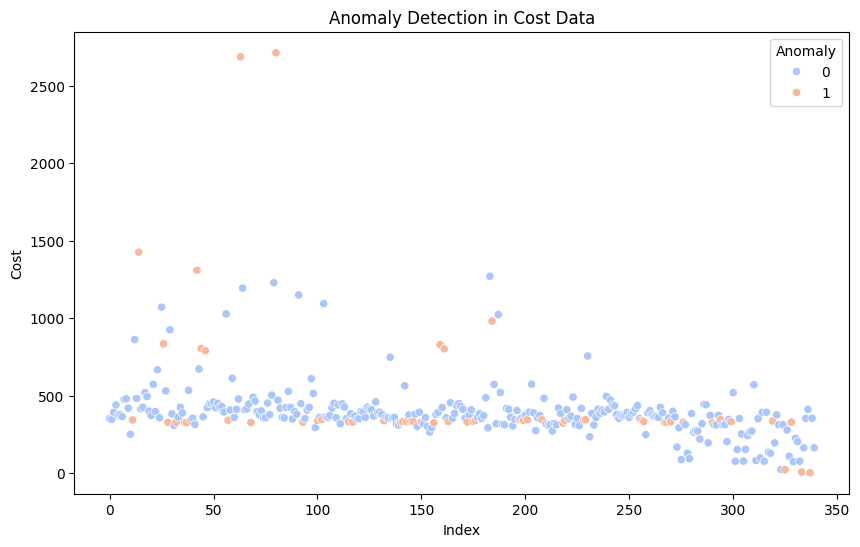

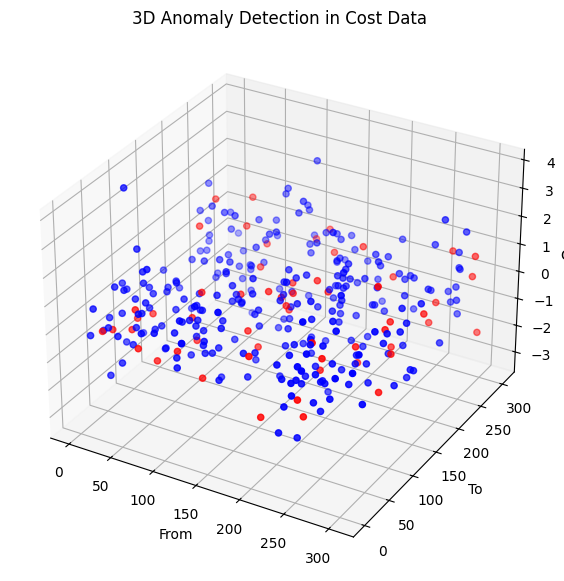

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='cost', hue='Anomaly', palette='coolwarm', marker='o')
plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('Anomaly Detection in Cost Data')
plt.show()

np.random.seed(42)
df['cost'] = np.random.normal(size=len(df))

# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
colors = df['Anomaly'].apply(lambda x: 'red' if x == 1 else 'blue')
sc = ax.scatter(df['from'], df['to'], df['cost'], c=colors, marker='o')

ax.set_xlabel('From')
ax.set_ylabel('To')
ax.set_zlabel('Cost')
ax.set_title('3D Anomaly Detection in Cost Data')

plt.show()

In [4]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df[['cost']], df['Anomaly'])
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: -0.047


In [5]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(df[['cost']], df['Anomaly'])

print(f'Davies-Bouldin Index: {dbi:.3f}')

Davies-Bouldin Index: 6.710
